In [87]:
pip install xlrd==2.0.1


In [88]:
import pandas as pd

df = pd.read_excel('Rotten_Tomatoes_Movies3.xls', engine='xlrd')

print(df.head())


                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                                                NaN      R   
3  Sidney Lumet's feature debut is a superbly wri...     NR   
4  One of D

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


# Checking for datetime columns and converting them to ordinal
datetime_columns = df.select_dtypes(include=['datetime64']).columns
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')
    df[col] = df[col].fillna(pd.Timestamp('1970-01-01'))
    df[col] = df[col].apply(lambda x: x.toordinal())

# Droping columns that are purely text and not useful for modeling
text_columns_to_drop = [col for col in df.columns if df[col].dtype == 'object']
df = df.drop(columns=text_columns_to_drop)

# Handling missing values in the target variable
df = df.dropna(subset=['audience_rating'])

# Separating features and target variable
X = df.drop('audience_rating', axis=1)
y = df['audience_rating']

# Identifying categorical and numerical columns
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Printing the numeric DataFrame
print("Numerical Features:\n", X[numerical_features].head())
print("Categorical Features:\n", X[categorical_features].head())

# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a preprocessing and modeling pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Calculating and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')


Numerical Features:
    in_theaters_date  on_streaming_date  runtime_in_minutes  \
0            733815             733952                83.0   
1            733892             734064                90.0   
2            722727             729263               118.0   
3            714517             730550                95.0   
4            713319             731355               127.0   

   tomatometer_rating  tomatometer_count  
0                  49                144  
1                  86                140  
2                  68                 22  
3                 100                 51  
4                  89                 27  
Categorical Features:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Mean Squared Error: 239.5134
R-squared: 0.4240


In [91]:
import matplotlib.pyplot as plt



# Display Results
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'True Values': y_test,
    'Predicted Values': y_pred
}).reset_index(drop=True)

# Style the DataFrame
styled_df = results_df.style.set_caption('Model Results')\
                            .background_gradient(cmap='viridis')\
                            .highlight_max(axis=0, color='orange')\
                            .highlight_min(axis=0, color='yellow')

# Displaying the styled DataFrame
styled_df



Mean Squared Error: 239.5134
R-squared: 0.4240


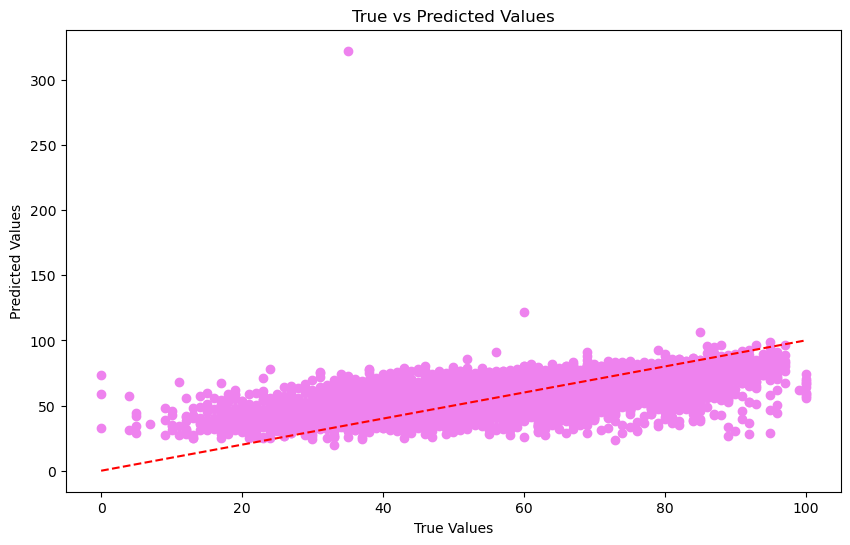

In [77]:
# Plot the True vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='violet')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()
